<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSF6wPRlCqNqg8KJypAIlUs4eJV_Pcysyriintzu8CxmzVwS-tM5A&s">

# Analysis of the Tips Dataset

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Initial-brainstorming:" data-toc-modified-id="Initial-brainstorming:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Initial brainstorming:</a></span></li></ul></li><li><span><a href="#Dataset-Layout" data-toc-modified-id="Dataset-Layout-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset Layout</a></span></li><li><span><a href="#Adding-Columns" data-toc-modified-id="Adding-Columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adding Columns</a></span></li><li><span><a href="#Basic-Statistics" data-toc-modified-id="Basic-Statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic Statistics</a></span><ul class="toc-item"><li><span><a href="#Numerical-Data" data-toc-modified-id="Numerical-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerical Data</a></span></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Sex" data-toc-modified-id="Sex-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#Smoker" data-toc-modified-id="Smoker-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Smoker</a></span></li><li><span><a href="#Day" data-toc-modified-id="Day-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Day</a></span></li><li><span><a href="#Time" data-toc-modified-id="Time-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Time</a></span></li></ul></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Relationship-Between-Tip-and-Group-Size" data-toc-modified-id="Relationship-Between-Tip-and-Group-Size-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Relationship Between Tip and Group Size</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>


### Initial brainstorming: 
What could be interesting about this dataset?
- Do people tip better on weekends? More likely to be out for the evening, possibly more likely to have a drink and therefore more likely to be generous with a tip?
- Do people tip more if they are part of a larger group? More people to chip in? Social pressure? Or would they be less likely to tip as the blame can be diffused among the group?
- On the other hand, are people likely to tip less if they are on theor own?
- Is there a sex difference in tipping? Why would there be? 
- Similarly, are men or women more likely to pay? Is there a difference in genders paying depending on group size? Cliche that men pay for dates if we look at tables of 2? Would the tips be higher in such cases?
- How is the dataset gendered if there are several people at each table? Presumably the person that pays for the table is the gender recorded.
- Do tips on average make up 10-15% of the bill or do they just round up to the nearest fiver/euro?
- Does tip percentage of the bill grow as the bill does?
- Are smokers more likely to tip? Why would they be/not? Maybe they would tip more as they are exposing staff to their smoking? Probably not enough smoker data to be significant.  
- Are smaller groups more likely to sit in smoking sections? Consideration for the whole group. Would the restaurant have more room for larger groups if they were to get rid of the smoking section? 
- Is there a difference in tips on weekdays versus the weekend? On weekdays would people be more likely to just be grabbing a work lunch? Similarly, are the overall bills lower? - Doesn't have all days of the week, just Thurs-Sun. 
- Which days/mealtimes are busiest? Does this affect the tips? Perhaps the service isn't as great if the place is super busy?
- Is it more likely there are larger groups on weekends as would be assumed?

https://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1036&context=articles
Article from 1984 seeing tipping is related to group size (larger groups tipped less), gender (men tipped more than women), and bill size (larger the per person bill, the lower the tip %). Of course, this is an old article. Would it even still be relevant?

Some plotting with tips database
https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset
https://seaborn.pydata.org/tutorial/categorical.html


Some relationship plots here: https://amitkushwaha.co.in/data-visualization-part-1.html

More linear regression https://devarea.com/python-machine-learning-example-linear-regression/#.XcsIcTP7RPY

Knowledge gaps in this database that could affect tipping:
- Food quality
- Customer service
- Restaurant atmosphere
- Payment methods (cash v credit)
- Customer demographics
- Length of time customer spent in the restaurant


# Introduction

The tips dataset is made up of information collected by a food server during the course of their restaurant shifts over a two and a half month period in 1990.[<sup>1</sup>](https://link.springer.com/chapter/10.1007%2F978-0-387-71762-3_7) It was first published in Bryant & Smith's (1995) *Practical Data Analysis: Case Studies in Business Statistics* but the data is available through the seaborn Python library. The server measured 7 different variables:

- Total bill: the total cost of the meal (US Dollars).
- Tip: the tip received for each meal (US Dollars).
- Sex: the sex of the person that paid for the meal.
- Smoker: whether there was a smoker in the party. 
- Day: the day of the week, Thursday-Sunday inclusive. 
- Time: whether it was lunch or dinner service.
- Size: the size of the party at the table.

This project investigates this dataset first by describing each of the variables and then exploring relationships between them. 

<br>

# Importing Libraries

In [1]:
# Importing libraries.
import seaborn as sns
sns.set() # apply default seaborn theme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<br>

# Describing the Dataset

A summary of information about the tips dataset below shows that it loads from seaborn as a pandas dataframe, which will be useful for laterstatistical analysis. There are 7 columns with 244 entries in each and, thankfully, no missing values to contend with. There are 2 float datatypes, 4 categorical datatypes, and 1 integer datatype.   

In [2]:
# Load dataset and view information.
tips_df = sns.load_dataset("tips")
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


<br>

## Dataset Layout

The first and last rows are displayed below, giving an overview of the layout of the dataset. The data looks to be consistent across all variables throughout. The datatypes of each column listed in the previous section appear to be the most appropriate for the data being represented, ie. numerical data is stored as floats or integers and categorical data is stored as categories. 

In [3]:
# Viewing the first 10 rows of the tips dataset
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
# Viewing the last 10 rows of the tips dataset
tips_df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## Adding Columns

I decided to add 2 columns to the dataset to aid in later analysis:

1. total_paid: the sum of the total bill and the tip to indicate the total amount on money given by the customer.
2. tip_percent: the tip percentage of the total bill.  

In [5]:
# total bill + tip
total_paid = tips_df.tip + tips_df.total_bill 
tips_df['total_paid'] = total_paid

# tip percent column
tip_percent = tips_df.tip/tips_df.total_bill*100
tips_df['tip_percent'] = tip_percent

<br>

## Basic Statistics

Below are some basic descriptive statistics for the tips dataset. The first section describes the numeric columns and the second describes the categorical columns. While it is possible to view all of these statistics in one table, I decided to split them as there are different descriptive fields for the different datatypes and separating them makes them more readable.

### Numerical Data

The numerical data shows the average total bill amount is 19.79 with an average tip of just under 3.00 and an average group size between 2-3 people. The additional columns have an average of 22.78 paid in total by customers and the average tip percentage is 16.08%. These figures may indicate that the food establishment is perhaps a cafe or bistro rather than a large restaurant. According to literature, the restaurant is an American national chain located in a suburban shopping mall,[<sup>2</sup>](https://link.springer.com/chapter/10.1007%2F978-0-387-71762-3_7) which could indicate a more casual dining setting, cheaper food prices[<sup>3</sup>](https://www.foodfranchise.com/blog/food-franchise-blog/the-biggest-differences-between-mall-and-stand-alone-locations) and could perhaps affect tipping. 



In [6]:
# Numerical statistics.
tips_df.describe()

,total_bill,tip,size,total_paid,tip_percent
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,22.784221,16.080258
std,8.902412,1.383638,0.951100,9.890116,6.107220
min,3.070000,1.000000,1.000000,4.070000,3.563814
25%,13.347500,2.000000,2.000000,15.475000,12.912736
50%,17.795000,2.900000,2.000000,20.600000,15.476977
75%,24.127500,3.562500,3.000000,27.722500,19.147549
max,50.810000,10.000000,6.000000,60.810000,71.034483


<br>

### Categorical Data

The statistics for categorical data below shows that there are 2 unique values for the *sex* and *smoker* categories, Male/Felmale and Yes/No respectively, as one would expect for these categories. The data looks to be spread across 4 days of the week rather than entire week, indicating that the server only worked certain days, and 2 mealtimes are assessed. Overall these categories demonstrate that the majority of bills were paid by non-smoking men and the server was busiest on Saturday at dinner time. Below I will take a closer look at the breakdown of each of these categories individually and touch on their relationship with the bill, tip and size variables.

In [7]:
# Categorical statistics.
categories = tips_df[['sex', 'smoker', 'day', 'time']]
categories.describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


#### Sex
This category records the sex of the person that paid the bill. The pie chart[<sup>4</sup>](https://stackoverflow.com/a/31499100) [<sup>5</sup>](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html) below shows that men paid most bills at 64.3%, with women paying 35.7%.


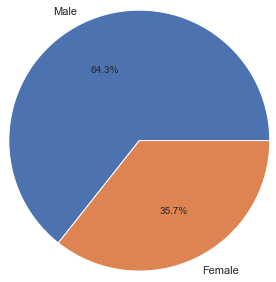

In [8]:
# Pie chart showing percentage of men and women who paid the bill.
sex = tips_df.groupby('sex').size()
plt.pie(sex, labels=sex.index, radius=1.5, autopct='%1.1f%%')
plt.show()

The average total bill and tip amount paid by men is slightly higher than those paid by women with a 2.94 difference. However, even though the actual values are lower, it looks like women pay a slightly higher average tip percentage with 16.6% versus 15.8% paid by men. So it appears that, while substantially fewer women pay the bill, and when they do it's generally a lower bill, that they are ever so slightly more proportionally generous with the tip percentage. There is very little difference in group size but men may be more likely to pay for marginally larger groups.  

In [69]:
# Mean figures by sex
tips_df.groupby("sex").mean()

,total_bill,tip,size,total_paid,tip_percent
sex,,,,,
Male,20.744076,3.089618,2.630573,23.833694,15.765055
Female,18.056897,2.833448,2.459770,20.890345,16.649074


The relational plot below helps to visualise the differences. The plot is certainly dominated with male paying the bill/tip

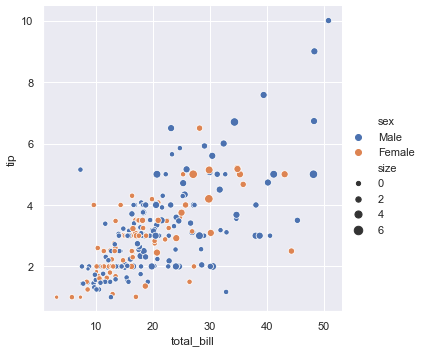

In [74]:
# https://amitkushwaha.co.in/data-visualization-part-1.html

sns.relplot(x="total_bill", y="tip", hue="sex", size='size', data=tips_df)
plt.show()

<br>

#### Smoker

Being a restaurant in 1990s America, this establishment offered smoking and non-smoking sections. The variable *smoker* denotes the section where a party was seated rather than the habits of the paying customer. The chart below shows that 61.9% opted to sit in the non-smoking section while 38.1% sat in the smoking section.

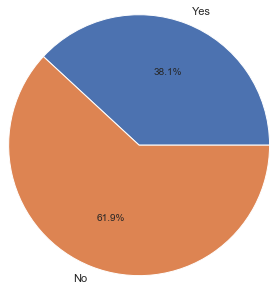

In [10]:
# Pie chart showing percentage that were smokers and non-smokers 
smoker = tips_df.groupby('smoker').size()
plt.pie(smoker, labels=smoker.index, radius=1.5, autopct='%1.1f%%')
plt.show()

There does not seem to be much difference between customers that sit in the smoking section versus those that sit in the non-smoking section. Smokers appear to spend slightly more and tip a little better on average than non-smokers, but the difference is not substantial at only 0.39%. The group sizes in non-smoking sections seem to be marginally larger than in smoking sections.

In [11]:
tips_df.groupby('smoker').mean()

,total_bill,tip,size,total_paid,tip_percent
smoker,,,,,
Yes,20.756344,3.008710,2.408602,23.765054,16.319604
No,19.188278,2.991854,2.668874,22.180132,15.932846


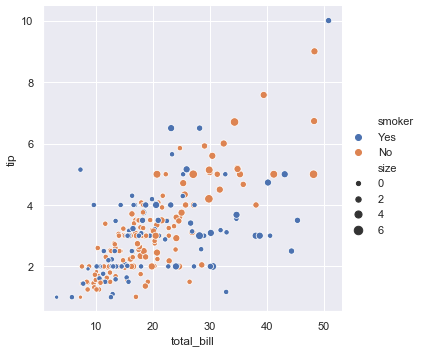

In [75]:
# https://amitkushwaha.co.in/data-visualization-part-1.html

sns.relplot(x="total_bill", y="tip", hue="smoker", size='size', data=tips_df)
plt.show()

<br>

#### Day

During the time this dataset was put together, the server works 4 days per week, from Thursday - Sunday inclusive. However, it appears very little of their time was spent working Fridays. Perhaps they swapped a couple of shifts with a co-worker or maybe the schedule sometimes switches them from Thursday to Friday. We could maybe speculate that the person actually works 3 days per week, one weekday and all weekend. Saturday is busiest day for the worker accounting for 35.7% of customers, followed by Sunday at 31.1%, Thursday at 25.4% and finally Friday which only accounts for 7.8% of customers.

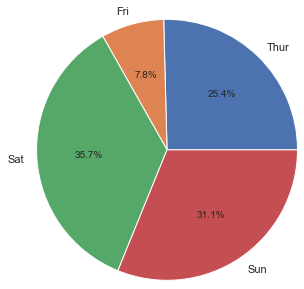

In [12]:
# Pie chart showing percentage of entries by day.
day = tips_df.groupby('day').size()
plt.pie(day, labels=day.index, radius=1.5, autopct='%1.1f%%')
plt.show()

The average total amount paid by customers is higher on the weekend than the weekdays, which makes sense as the figures above indicate that these days are much busier. What might be interesting is that on the busiest day, Saturday, the average tip percentage is the lowest of all 4 days at 15.3%, while it exceeds 16% every other day. Perhaps the server finds themselves a bit overwhelmed when the restaurant is very busy and their customer service suffers slightly, which affects the tip. Also interesting is that the quietest day, Friday, accounts for the lowest total amount paid and yet the highest tip percentage at nearly 17% so maybe this accounts for the inverse, that the server has the time to be especially attentive to their customers. However, the amount of data available for Friday is too low to make such assumptions. Group size looks to be closer to 2 people on average for Thursday and Friday with closer to 3 people on Saturday and Sunday.

In [13]:
tips_df.groupby('day').mean()

,total_bill,tip,size,total_paid,tip_percent
day,,,,,
Thur,17.682742,2.771452,2.451613,20.454194,16.127563
Fri,17.151579,2.734737,2.105263,19.886316,16.991303
Sat,20.441379,2.993103,2.517241,23.434483,15.315172
Sun,21.410000,3.255132,2.842105,24.665132,16.689729


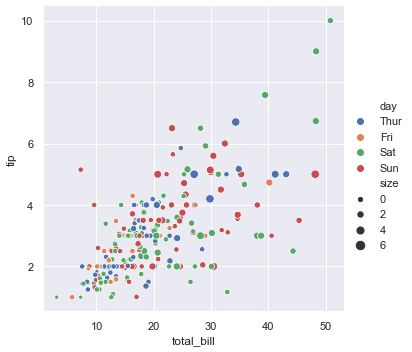

In [80]:
# https://amitkushwaha.co.in/data-visualization-part-1.html

sns.relplot(x="total_bill", y="tip", hue="day", size='size', data=tips_df)
plt.show()

<br>

#### Time


The majority of the server's shifts look to be scheduled for dinner time with 72.1% of values versus just 27.9% for lunch.

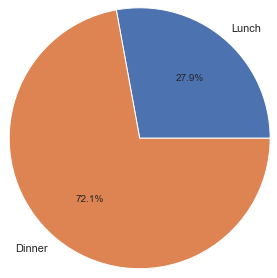

In [14]:
# Pie chart showing percentage of dataset entries for each meal time
time = tips_df.groupby('time').size()
plt.pie(time, labels=time.index, radius=1.5, autopct='%1.1f%%')
plt.show()

As might be expected, the customers at this restaurant generally spend more on dinner than lunch with a difference of 4.00 in total amount paid. However, while the bill and tip values are higher, the actual tip percentage is slightly lower with lunchtime patrons tipping 16.41% compared to dinner patron's 15.95%. 

In [15]:
tips_df.groupby('time').mean()

,total_bill,tip,size,total_paid,tip_percent
time,,,,,
Lunch,17.168676,2.728088,2.411765,19.896765,16.412793
Dinner,20.797159,3.102670,2.630682,23.899830,15.951779


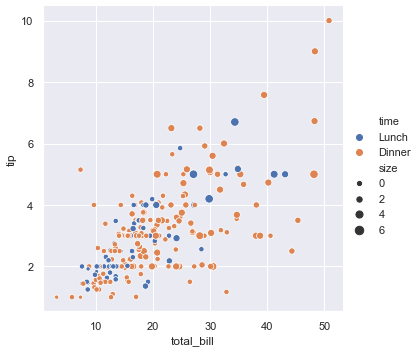

In [77]:
# https://amitkushwaha.co.in/data-visualization-part-1.html

sns.relplot(x="total_bill", y="tip", hue="time", size='size', data=tips_df)
plt.show()

<br>

# Relationship Between Tip and Total Bill

It might be expected that there is a positive relationship between the tip and the bill, given that a tip is generally calculated as a certain percentage of the bill.

In [16]:
tips_df.tip_percent.describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_percent, dtype: float64

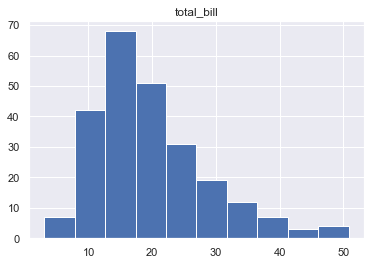

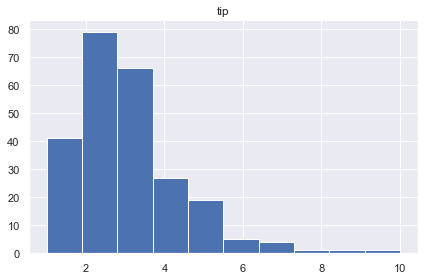

In [17]:
# Bill and tip histograms
tips_df.hist('total_bill')
tips_df.hist('tip')
plt.tight_layout()

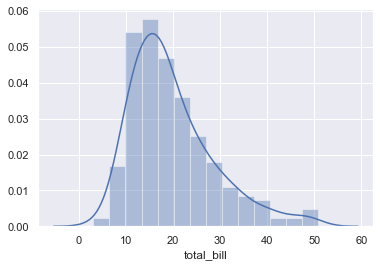

In [18]:
# Total bill histogram using seaborn
sns.distplot(tips_df.total_bill)

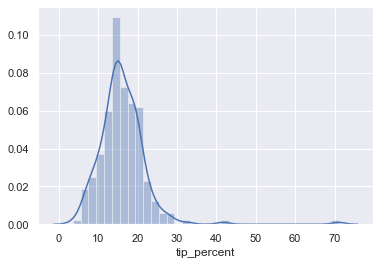

In [19]:
# Tips histogram using seaborn
sns.distplot(tips_df.tip_percent)

<br>




In [20]:
tips_df.sort_values(by='tip_percent')

,total_bill,tip,sex,smoker,day,time,size,total_paid,tip_percent
237,32.83,1.17,Male,Yes,Sat,Dinner,2,34.00,3.563814
102,44.30,2.50,Female,Yes,Sat,Dinner,3,46.80,5.643341
57,26.41,1.50,Female,No,Sat,Dinner,2,27.91,5.679667
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,5.944673
187,30.46,2.00,Male,Yes,Sun,Dinner,5,32.46,6.565988
...,...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,29.67,28.053517
232,11.61,3.39,Male,No,Sat,Dinner,2,15.00,29.198966
67,3.07,1.00,Female,Yes,Sat,Dinner,1,4.07,32.573290
178,9.60,4.00,Female,Yes,Sun,Dinner,2,13.60,41.666667


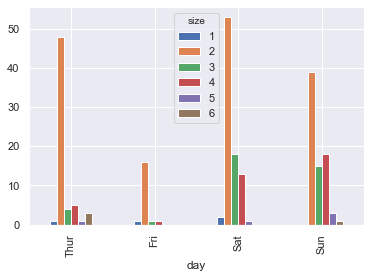

In [21]:
# Example in Python for data analysis p. 274
# Shows group size by day
groups = pd.crosstab(tips_df['day'], tips_df['size'])
groups.plot.bar()

In [22]:
# Finding percentage of total_paid that were odd and even - to reflect people paying to the nearest dollar.
odd = []
even = []
for i in tips_df.total_paid:
    if i == int(i):
        even.append(i)
    else:
        odd.append(i)
        
print(len(odd)/len(tips_df)*100)
print(len(even)/len(tips_df)*100)

75.40983606557377
24.59016393442623


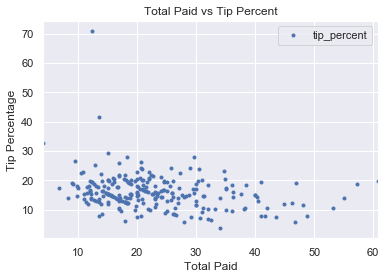

In [23]:
tips_df.plot(x='total_paid', y='tip_percent', style='.')  
plt.title('Total Paid vs Tip Percent')  
plt.xlabel('Total Paid')  
plt.ylabel('Tip Percentage')  
plt.show()

In [24]:
# Help from Python for data analysis p. 302

# define a function to find the top tipper
def top_tipper(df, n=5, column='tip_percent'):
    return df.sort_values(by=column)[-n:]

top_tipper(tips_df, n=25)

,total_bill,tip,sex,smoker,day,time,size,total_paid,tip_percent
9,14.78,3.23,Male,No,Sun,Dinner,2,18.01,21.853857
87,18.28,4.00,Male,No,Thur,Lunch,2,22.28,21.881838
42,13.94,3.06,Male,No,Sun,Dinner,2,17.00,21.951220
100,11.35,2.50,Female,Yes,Fri,Dinner,2,13.85,22.026432
222,8.58,1.92,Male,Yes,Fri,Lunch,1,10.50,22.377622
46,22.23,5.00,Male,No,Sun,Dinner,2,27.23,22.492128
20,17.92,4.08,Male,No,Sat,Dinner,2,22.00,22.767857
17,16.29,3.71,Male,No,Sun,Dinner,3,20.00,22.774708
6,8.77,2.00,Male,No,Sun,Dinner,2,10.77,22.805017
214,28.17,6.50,Female,Yes,Sat,Dinner,3,34.67,23.074192


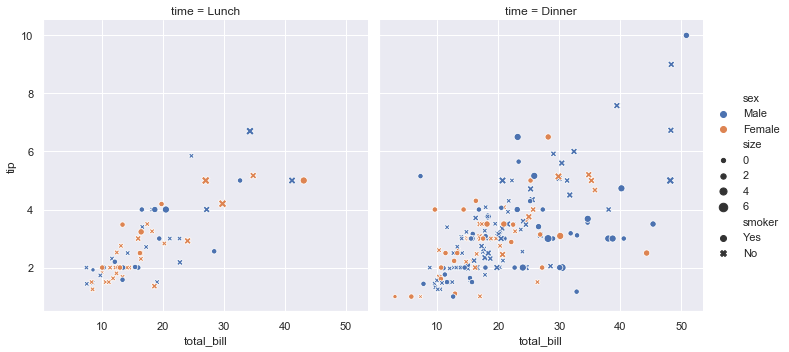

In [25]:
# https://seaborn.pydata.org/introduction.html
sns.relplot(x="total_bill", y="tip", col="time", hue="sex", style="smoker", size="size", data=tips_df)

The below swarm plot gives an idea of the worker's shifts over the days measured. It looks like they have the lunch shift on a Thursday and perhaps caught one early dinner customer before the end of a shift. On Fridays perhaps the worker only works half a shift, from lunch into dinner, which may account for the relatively small numbers. Or maybe they covered a shift or two for a co-worker and their regular days are Thursday, Saturday an Sunday. On Saturdays and Sundays, the employee works the busy dinner shift.

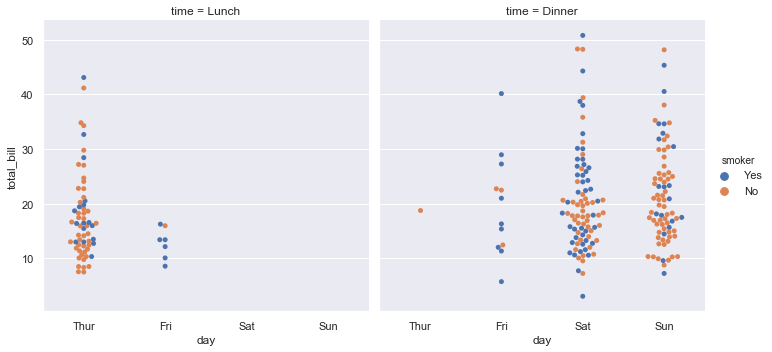

In [26]:
# https://seaborn.pydata.org/introduction.html
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", kind="swarm", data=tips_df);

In [27]:
tips_df.groupby(["day", "time"]).size()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
dtype: int64

<br>

## Regression

Followed this guide: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

Linear regression is a type of predictive analysis that can assess whether there is a linear relationship between a dependent variable and one or more independent variables. With the tips dataset, I will use linear regression to see if tips (dependent variable) can be predicted based on the total bill amount (independent variable). 

The 2-dimensional plot below visualises the relationship between the total bill and tip values. It might be expected that the higher the bill, the higher the tip would be and there does appear to be a slight linear trend in that direction. This pattern looks to be more evident in the lower bill amounts (under €25 or so) but that could be related to the relatively few bills that are in the higher bracket.

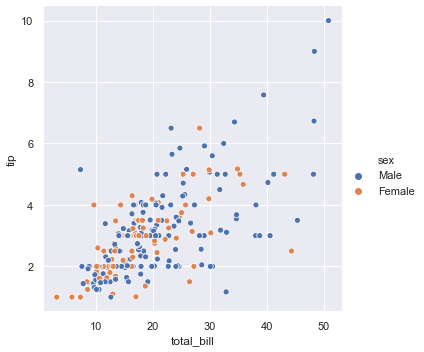

In [65]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

sns.relplot(x="total_bill", y="tip", hue="sex", data=tips_df)
plt.show()

In [29]:
# number of bills under €25 (probably not needed - percentage and graph should be enough)
tips_df.total_bill[tips_df.total_bill < 25].count()

188

The descriptive statistics in the first section showed that 75% of the total bills were under 24.1275 and the plot below demonstrates how the bills are largely skewed to the lower end of the scale with most roughly between 10-20. 

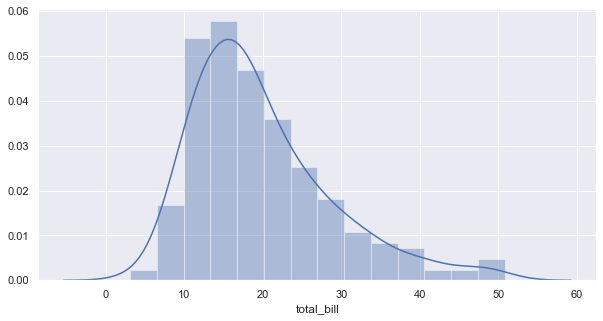

In [30]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.distplot(tips_df['total_bill'])
plt.show()

Similarly, the tips also skew towards the lower end of the scale. 

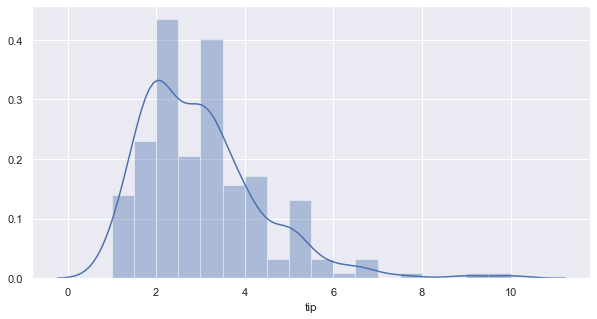

In [31]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.distplot(tips_df['tip'])
plt.show()

The data next needs to be divided into attributes (independent variable - total_bill) and labels (dependent variable - tips).
Figure out what the (-1, 1) is about.

In [32]:
X = tips_df['total_bill'].values.reshape(-1,1)
y = tips_df['tip'].values.reshape(-1,1)

Training and testing the linar regression model. The data will be split into 80% for testing and 20% for training

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# intercept (where it intercepts an axis??)
print(regression.intercept_) 

[1.02854395]


In [36]:
# slope (steepness of the line)
print(regression.coef_)

[[0.0968534]]


In [37]:
# Prediction - test
y_pred = regression.predict(X_test)

In [38]:
# Compare test predictions against acutal data
test_model = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
test_model

,Actual,Predicted
0,2.64,2.732195
1,3.76,2.799993
2,3.51,2.916217
3,1.00,1.730731
4,2.50,2.604349
5,1.00,1.585451
6,3.08,2.764157
7,5.65,3.288134
8,3.50,2.786433
9,3.68,4.384514


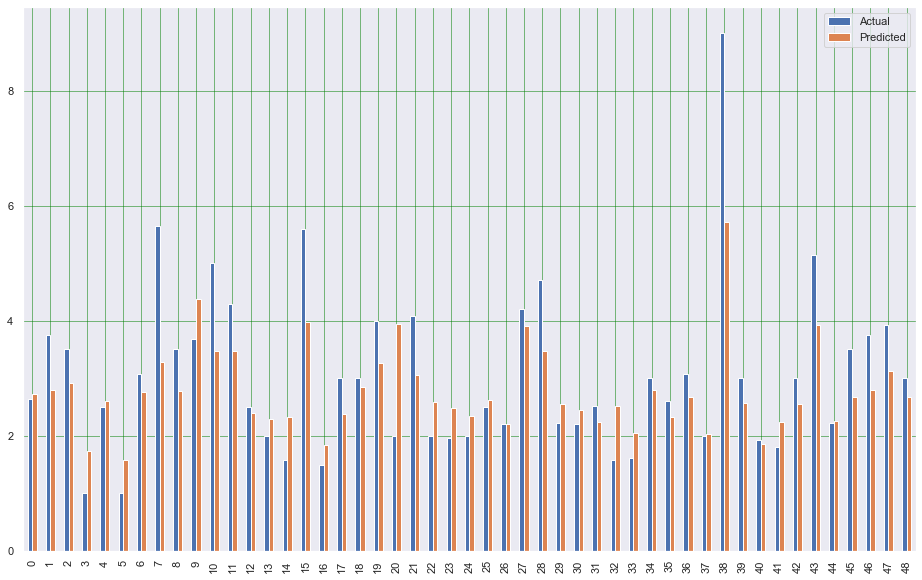

In [39]:
# View the prediction versus actual values as a bar chart
test_model.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Slope of the line a bit low?

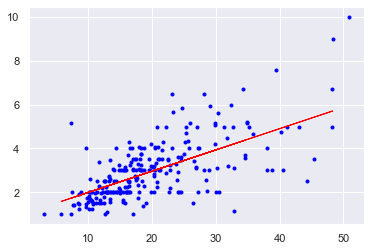

In [40]:
# lining it up with the whole dataset (changed it to whole dataset rather than just test data as in example - we have a much smaller dataset)
plt.scatter(tips_df.total_bill, tips_df.tip, marker='.', color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [41]:
# Evaluating the performance of the algorithm
# Figure out what these mean!
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6564074900962106
Mean Squared Error: 0.8213090642766288
Root Mean Squared Error: 0.9062610353957786


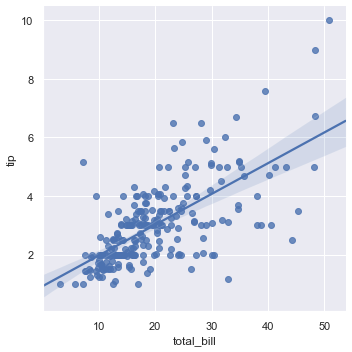

In [42]:
# Actual linear regression model
# https://seaborn.pydata.org/introduction.html
sns.lmplot(x="total_bill", y="tip", data = tips_df)

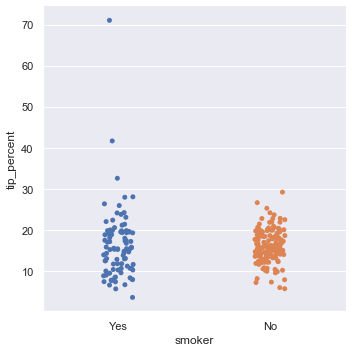

In [43]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="smoker", y="tip_percent", data=tips_df);

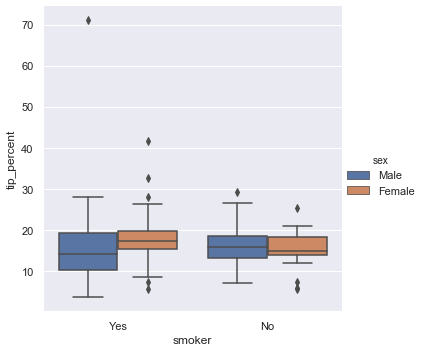

In [44]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="smoker", y="tip_percent", hue="sex", kind="box", data=tips_df)

<br>

## Relationship Between Tip and Group Size

It might be presumed that larger groups of people should tip more since there are more people to share the task, but research has shown the opposite tends to be true  (https://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1036&context=articles) 

In [53]:
tips_df['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

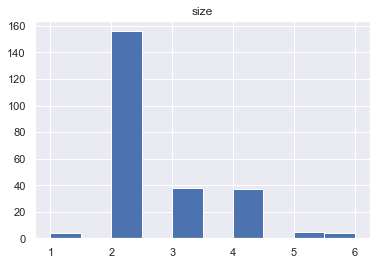

In [50]:
pd.DataFrame.hist(data=tips_df, column='size')
plt.show()

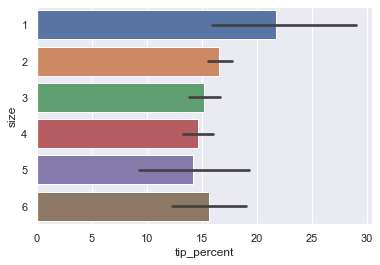

In [84]:
# Adapted from Python for Data Analysis p. 276
sns.barplot(x='tip_percent', y='size', data=tips_df, orient='h')
plt.show()

Looking at the tip values would indicate that as the group gets larger, so do the tips but proportionally smaller groups are better tippers in terms of bill percentage (above)

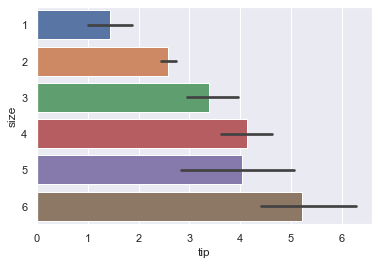

In [85]:
sns.barplot(x='tip', y='size', data=tips_df, orient='h')
plt.show()

In [58]:
# https://data-and-design.readthedocs.io/en/latest/02-introPandas.html
tips_df.pivot(columns='size', values='tip_percent').describe()

size,1,2,3,4,5,6
count,4.000000,156.000000,38.000000,37.000000,5.000000,4.000000
mean,21.729202,16.571919,15.215685,14.594901,14.149549,15.622920
std,8.034186,6.684824,4.545887,4.239533,6.773266,4.215338
min,13.793103,3.563814,5.643341,7.745933,6.565988,10.379905
25%,17.077869,13.522313,12.475755,11.774956,10.657194,13.165446
50%,20.275206,15.610418,15.932311,14.669927,12.138869,16.289124
75%,24.926539,19.503614,18.613473,16.979656,17.219430,18.746598
max,32.573290,71.034483,23.074192,28.053517,24.166264,19.533528


## References

1. The tips dataset: https://link.springer.com/chapter/10.1007%2F978-0-387-71762-3_7
2. Information about the restaurant: https://link.springer.com/chapter/10.1007%2F978-0-387-71762-3_7
3. Mall restaurants https://www.foodfranchise.com/blog/food-franchise-blog/the-biggest-differences-between-mall-and-stand-alone-locations
4. Pie chart code adapted from https://stackoverflow.com/a/31499100 
5. Pie chart code adapted from  https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

Large groups tip less: https://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1036&context=articles